In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import math
# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [16]:
size=200
T=1000
ez=np.zeros(size)
hy=np.zeros(size)
#ez[50]=1

In [3]:
test=4%2
print(test)

0


In [17]:
er= lambda x: 2+2*(x%2)
for i in range(10):
    print (er(i))

2
4
2
4
2
4
2
4
2
4


In [18]:

def fieldupdate3(T=10,size=100,E=ez,H=hy):
    imp0=377
    E_history=[]
    H_history=[]
    test=[]
    for t in range(T):
        for i in range(len(E)-1):
            H[i]=H[i]+(E[i+1]-E[i])/imp0
        for j in range(len(E)-1):
            E[j+1]=E[j+1]+(H[j+1]-H[j])*imp0/er(int(j+1))
            
        E[0]=math.exp(-(t+1-0.3*size)*(t+1-0.3*size)/100)
        test.append(E[int(0.5*size)])
        E_history.append(E.copy())
        H_history.append(H.copy())
    with open("E field history.txt", 'w') as f:
        for member in E_history:
            f.write(str(member) + '\n')
    with open("H field history.txt", 'w') as f:
        for member in H_history:
            f.write(str(member) + '\n')
    E_history=np.array(E_history)
    return E,H,test, E_history



In [31]:
EZ,HY,test,E_history=fieldupdate3(T,size,ez,hy)
print(type(E_history))
E_new=E_history.copy().reshape(-1)



<class 'numpy.ndarray'>


In [33]:

X=[]
Y=[]
for i in range(T):
    for j in range(size):
        X.append(i)
        Y.append(j)
X=np.array(X)
Y=np.array(Y)
#print(test)

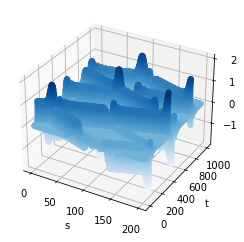

In [34]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = E_new
xdata = Y
ydata = X
plt.xlabel('s')
plt.ylabel('t')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');


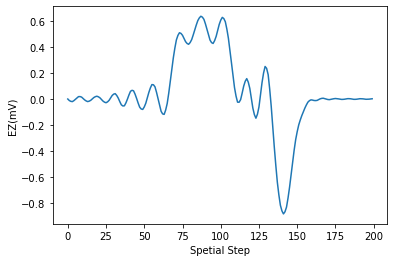

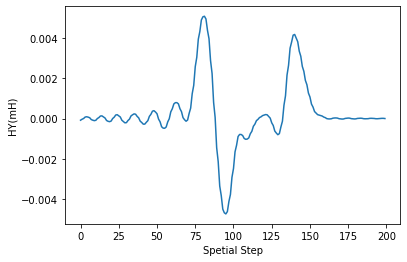

In [32]:

#plot for final states
plt.plot(EZ)
plt.xlabel('Spetial Step')
plt.ylabel('EZ(mV)')
plt.show()
plt.plot(HY)
plt.xlabel('Spetial Step')
plt.ylabel('HY(mH)')
#plt.ylabel('some numbers')
plt.show()# 

In [29]:
plt.plot(E_history[])
plt.xlabel('Spetial Step')
plt.ylabel('EZ(mV)')
plt.show()

SyntaxError: invalid syntax (<ipython-input-29-7eb471c80cf6>, line 1)

In [24]:
file= open("E field history.txt", "r")
data=file.read()
print((data))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



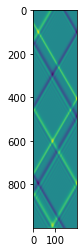

In [35]:
plt.imshow(E_history)